In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import helper
import metrics
import _init_paths
import torch
import torch.utils.data
from opts import opts
from lib.models.model import create_model, load_model, save_model
from models.data_parallel import DataParallel
from logger import Logger
from datasets.dataset_factory import get_dataset
from trains.train_factory import train_factory
from pytorch_unet_center_wh import train_model
import unet_models
import os,sys
#import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import helper
#import simulation
from tqdm import tqdm
import time
import copy
import numpy as np
import torch
import metrics
from metrics import MetricsCollection
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models
from test_model import test

In [2]:
class opts(object):
  def __init__(self):
    self.seed = 327
    self.dataset = 'shape'
    self.task = 'ctdet'
    self.device = 'cuda'
    self.shape_param = ''
    self.shape_param_value = ''
    self.data_dir = '/home/mehdi/CenterNet-master/data'
    self.batch_size = 20
    self.no_color_aug = True
    self.num_workers = 4
    self.keep_res = True
    self.pad = 127
    self.not_rand_crop = True
    self.scale = 0.4
    self.shift = 0.1
    self.flip = 0.5
    self.down_ratio = 4
    self.mse_loss = True
    self.gpus = 0
    self.gpus_str = '0'
    self.input_res = -1
    self.input_h = -1
    self.input_w = -1
    self.cat_spec_wh = True
    self.not_reg_offset = True
    self.reg_offset = not self.not_reg_offset
    self.save_dir = '/home/mehdi/CenterNet-master/MaskCenter_experimets'
    self.debug_dir = '/home/mehdi/CenterNet-master/experiments'
    self.trainval = True
    self.test_scales = '1'
    self.exp_id = 'default'
    self.debug = 0
    self.debugger_theme = 'white'
    self.fix_res = True
    self.flip_test =True
    #self.root_dir = os.path.join(os.path.dirname(__file__), '..', '..')
    #self.data_dir = os.path.join(self.root_dir, 'data')

In [3]:
opt = opts()

In [ ]:
test(opt)

heads {'hm': 5, 'wh': 10}
==> initializing shapes test data.
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!
Loaded test 8000 samples
Creating model...
> /home/mehdi/CenterNet-master/src/lib/detectors/ctdet.py(32)process()
-> output = self.model(images)#[-1]


(Pdb)  images.shape


torch.Size([2, 3, 128, 128])


(Pdb)  images[0].shape


torch.Size([3, 128, 128])


(Pdb)  a =  images[0].shape


self = <detectors.ctdet.CtdetDetector object at 0x7efc85c6b390>
images = tensor([[[[ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          ...,
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514]],

         [[ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          ...,
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449]],

         [[-1.0564, -1.0564, 

(Pdb)  a.shape


self = <detectors.ctdet.CtdetDetector object at 0x7efc85c6b390>
images = tensor([[[[ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          ...,
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514]],

         [[ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          ...,
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449]],

         [[-1.0564, -1.0564, 

(Pdb)  a.shape


self = <detectors.ctdet.CtdetDetector object at 0x7efc85c6b390>
images = tensor([[[[ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          ...,
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514]],

         [[ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          ...,
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449]],

         [[-1.0564, -1.0564, 

(Pdb)  a.shape


self = <detectors.ctdet.CtdetDetector object at 0x7efc85c6b390>
images = tensor([[[[ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          ...,
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514],
          [ 2.0514,  2.0514,  2.0514,  ...,  2.0514,  2.0514,  2.0514]],

         [[ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          ...,
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449],
          [ 1.6449,  1.6449,  1.6449,  ...,  1.6449,  1.6449,  1.6449]],

         [[-1.0564, -1.0564, 

(Pdb)  print(a.shape)


*** NameError: name 'a' is not defined


(Pdb)  uu = images[0]
(Pdb)  uu.shape


torch.Size([3, 128, 128])


(Pdb)  uu.view(1,...)


*** TypeError: 'ellipsis' object cannot be interpreted as an integer


(Pdb)  uu.view(1,-1)


tensor([[ 2.0514,  2.0514,  2.0514,  ..., -1.0564, -1.0564, -1.0564]],
       device='cuda:0')


(Pdb)  uu.shape


torch.Size([3, 128, 128])


(Pdb)  uu.resize(1,:,:,:)


*** SyntaxError: invalid syntax


(Pdb)  uu.reshape(1,...)


*** TypeError: 'ellipsis' object cannot be interpreted as an integer


(Pdb)  uu.reshape(1,:,:,:)


*** SyntaxError: invalid syntax


(Pdb)  uu.reshape(1,:,:,:)


*** SyntaxError: invalid syntax


In [4]:
def train_model(model, optimizer, lr_scheaduler, data_loader, device, max_epochs=500): #loaders
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    has_waited = 0
    stop_training = False
    earlystop_patience = 500

    epoch_metrics = MetricsCollection()

    for epoch in range(max_epochs):
        print('Epoch {}/{}'.format(epoch, max_epochs - 1))
        #print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
        #    if phase == 'train':
        #        model.train()  # Set model to training mode
        #    else:
        #        model.eval()  # Set model to evaluate mode

            batch_metrics = MetricsCollection()

            #########################
            # loader = loaders[phase]
            #pbar = tqdm(data_loader, total=len(data_loader), ncols=0)#, desc="Epoch {} {}".format(epoch, phase)
            for ind, (img_id, batch) in enumerate(data_loader): #data_loader


                for k in batch:
                    if k != 'meta':
                        batch[k] = batch[k].to(device=device, non_blocking=True)
                inputs,class_masks,center_masks,width_masks,height_masks =batch['input'],batch['gt_segmap'], batch['gt_ctmap'], batch['gt_widmap'], batch['gt_heimap'] # loss_stats
                
                output, losses = model(inputs, class_masks, center_masks, width_masks, height_masks) #batch
                #loss = loss.mean()
                loss = losses['loss']
                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
            #pbar = tqdm(data_loader, total=len(data_loader), desc="Epoch {} {}".format(epoch, phase), ncols=0)
            # for i, (inputs, class_masks, center_masks, width_masks, height_masks) in enumerate(pbar):
            #########################




                #inputs = inputs.to(device)
                #class_masks = class_masks.to(device)
                #center_masks = center_masks.to(device)
                #width_masks = width_masks.to(device)
                #height_masks = height_masks.to(device)

                #optimizer.zero_grad()

                # compute output
                #with torch.set_grad_enabled(phase == 'train'):
                #    outputs, losses = model(inputs, class_masks, center_masks, width_masks, height_masks)

                #if phase == 'train':
                #    loss = losses['loss']
                #    loss.backward()
                #    optimizer.step()

                for k, v in losses.items():
                    batch_metrics.add(phase, k, v.item())
                #if phase =='train':
                #    pbar.set_postfix(**{k: "{:.5f}".format(meter.avg) for k, meter in batch_metrics[phase].items()})
            output_str= ''
            for key, meter in batch_metrics[phase].items():
                epoch_metrics.add(phase, key, meter.avg)
                if phase=='train':
                    output_str+= '{}_{}'.format(phase, key)
                    output_str+= ':'
                    output_str+=str(meter.avg)
                    output_str+= ' '
                    
                    #print('{}_{}'.format(phase, key), meter.avg)
            print(output_str)

            if phase == 'val' and (epoch% 10==0):
                # monitor the val metrics
                best_epoch_index = epoch_metrics['val']['loss'].best()[1]
                if best_epoch_index == epoch:
                    has_waited = 1
                    best_model_wts = copy.deepcopy(model.state_dict())
                    print("Saving the best model state dict")
                else:
                    if has_waited >= earlystop_patience:
                        print("** Early stop in training: {} waits **".format(has_waited))
                        stop_training = True

                    has_waited += 1

                if type(lr_scheduler) is torch.optim.lr_scheduler.ReduceLROnPlateau:
                    lr_scheduler.step(epoch_metrics['val']['loss'].value)
                else:
                    lr_scheduler.step()

        #print()  # end of epoch
        if stop_training:
            break

    #time_elapsed = time.time() - since
    #print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    #load best model weights
    model.load_state_dict(best_model_wts)
    torch.save(model, './model_last.pth')
    print ('New model saved!')
    return model



In [5]:

def main():
  torch.manual_seed(opt.seed)
  Dataset = get_dataset(opt.dataset, opt.task)
  
  val_loader = torch.utils.data.DataLoader(
      Dataset(opt, 'val'), 
      batch_size=1, 
      shuffle=False,
      num_workers=1,
      pin_memory=True)
      


  train_loader = torch.utils.data.DataLoader(
      Dataset(opt, 'train'), 
      batch_size=opt.batch_size, 
      shuffle=True,
      num_workers=opt.num_workers,
      pin_memory=True,
      drop_last=True
  )
  #Mehdi
  ###############

  import models

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  num_class = Dataset.num_classes #6
  lr_factor = 0.1
  lr_patience = 1
  lr = 1e-4

  modelunet = unet_models.WidthHeightUNet(num_class).to(device)

  optimizer = torch.optim.Adam(modelunet.parameters(), lr=lr)
  lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                            factor=lr_factor,
                                                          patience=lr_patience,
                                                            verbose=True)

  model = train_model(modelunet, optimizer, lr_scheduler, train_loader,device)
  return model  

In [6]:
Dataset.num_classes

AttributeError: type object 'Dataset' has no attribute 'num_classes'

In [7]:
trained_model = main()


==> initializing shapes val data.
loading annotations into memory...
Done (t=0.33s)
creating index...
index created!
Loaded val 8000 samples
==> initializing shapes train data.
loading annotations into memory...
Done (t=0.26s)
creating index...
index created!
Loaded train 8000 samples
Epoch 0/499


/home/mehdi/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
/home/mehdi/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


train_bce_mask:0.3424206750094891 train_dice:0.5054660333693027 train_bce_center:0.022092014740919694 train_dice_center:0.4379007492214441 train_l2_width:0.0578253621282056 train_l2_height:0.058392438834998756 train_loss:1.4240972739458084 

Saving the best model state dict
Epoch 1/499
train_bce_mask:0.23666286241263151 train_dice:0.4058341024816036 train_bce_center:0.00822043047985062 train_dice_center:0.41352997586131096 train_l2_width:0.01636885185725987 train_l2_height:0.01624892321531661 train_loss:1.0968651446700095 

Epoch 2/499
train_bce_mask:0.14965631978586316 train_dice:0.3020665399730206 train_bce_center:0.007232946758158505 train_dice_center:0.41063351079821586 train_l2_width:0.015015362364938483 train_l2_height:0.014899582961807028 train_loss:0.8995042622089386 

Epoch 3/499
train_bce_mask:0.07160722095053643 train_dice:0.1941278061643243 train_bce_center:0.00638974299246911 train_dice_center:0.38687422811985017 train_l2_width:0.012560260909376666 train_l2_height:0.012162

In [5]:

def reverse_transform(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    #inp = np.clip(inp, 0, 1)
    #inp = (inp * 255).astype(np.uint8) 
    
    return inp

In [6]:
trained_model = torch.load('model_last.pth')

In [7]:
test= test_model()


TypeError: 'module' object is not callable

In [ ]:
for ind, (img_id, batch) in enumerate(val_loader):
   #print(img_id)
   #import pdb; pdb.set_trace()
   # import ipdb; ipdb.set_trace()
    for k in batch:
        if k != 'meta':
        batch[k] = batch[k].to(device=device, non_blocking=True)
    inputs, labels_mask, labels_center, labels_width, labels_height  =batch['input'],batch['gt_segmap'], batch['gt_ctmap'], batch['gt_widmap'], batch['gt_heimap']
    pred = model(inputs, labels_mask, labels_center, labels_width, labels_height )
    pred = pred[0] 
    #ret = detector.run(pre_processed_images)
    

   results[img_id.numpy().astype(np.int32)[0]] = ret['results']
   Bar.suffix = '[{0}/{1}]|Tot: {total:} |ETA: {eta:} '.format(
                  ind, num_iters, total=bar.elapsed_td, eta=bar.eta_td)
   for t in avg_time_stats:
     avg_time_stats[t].update(ret[t])
     Bar.suffix = Bar.suffix + '|{} {tm.val:.3f}s ({tm.avg:.3f}s) '.format(
       t, tm = avg_time_stats[t])
   bar.next()
 bar.finish()
 dataset.run_eval(results, opt.save_dir)

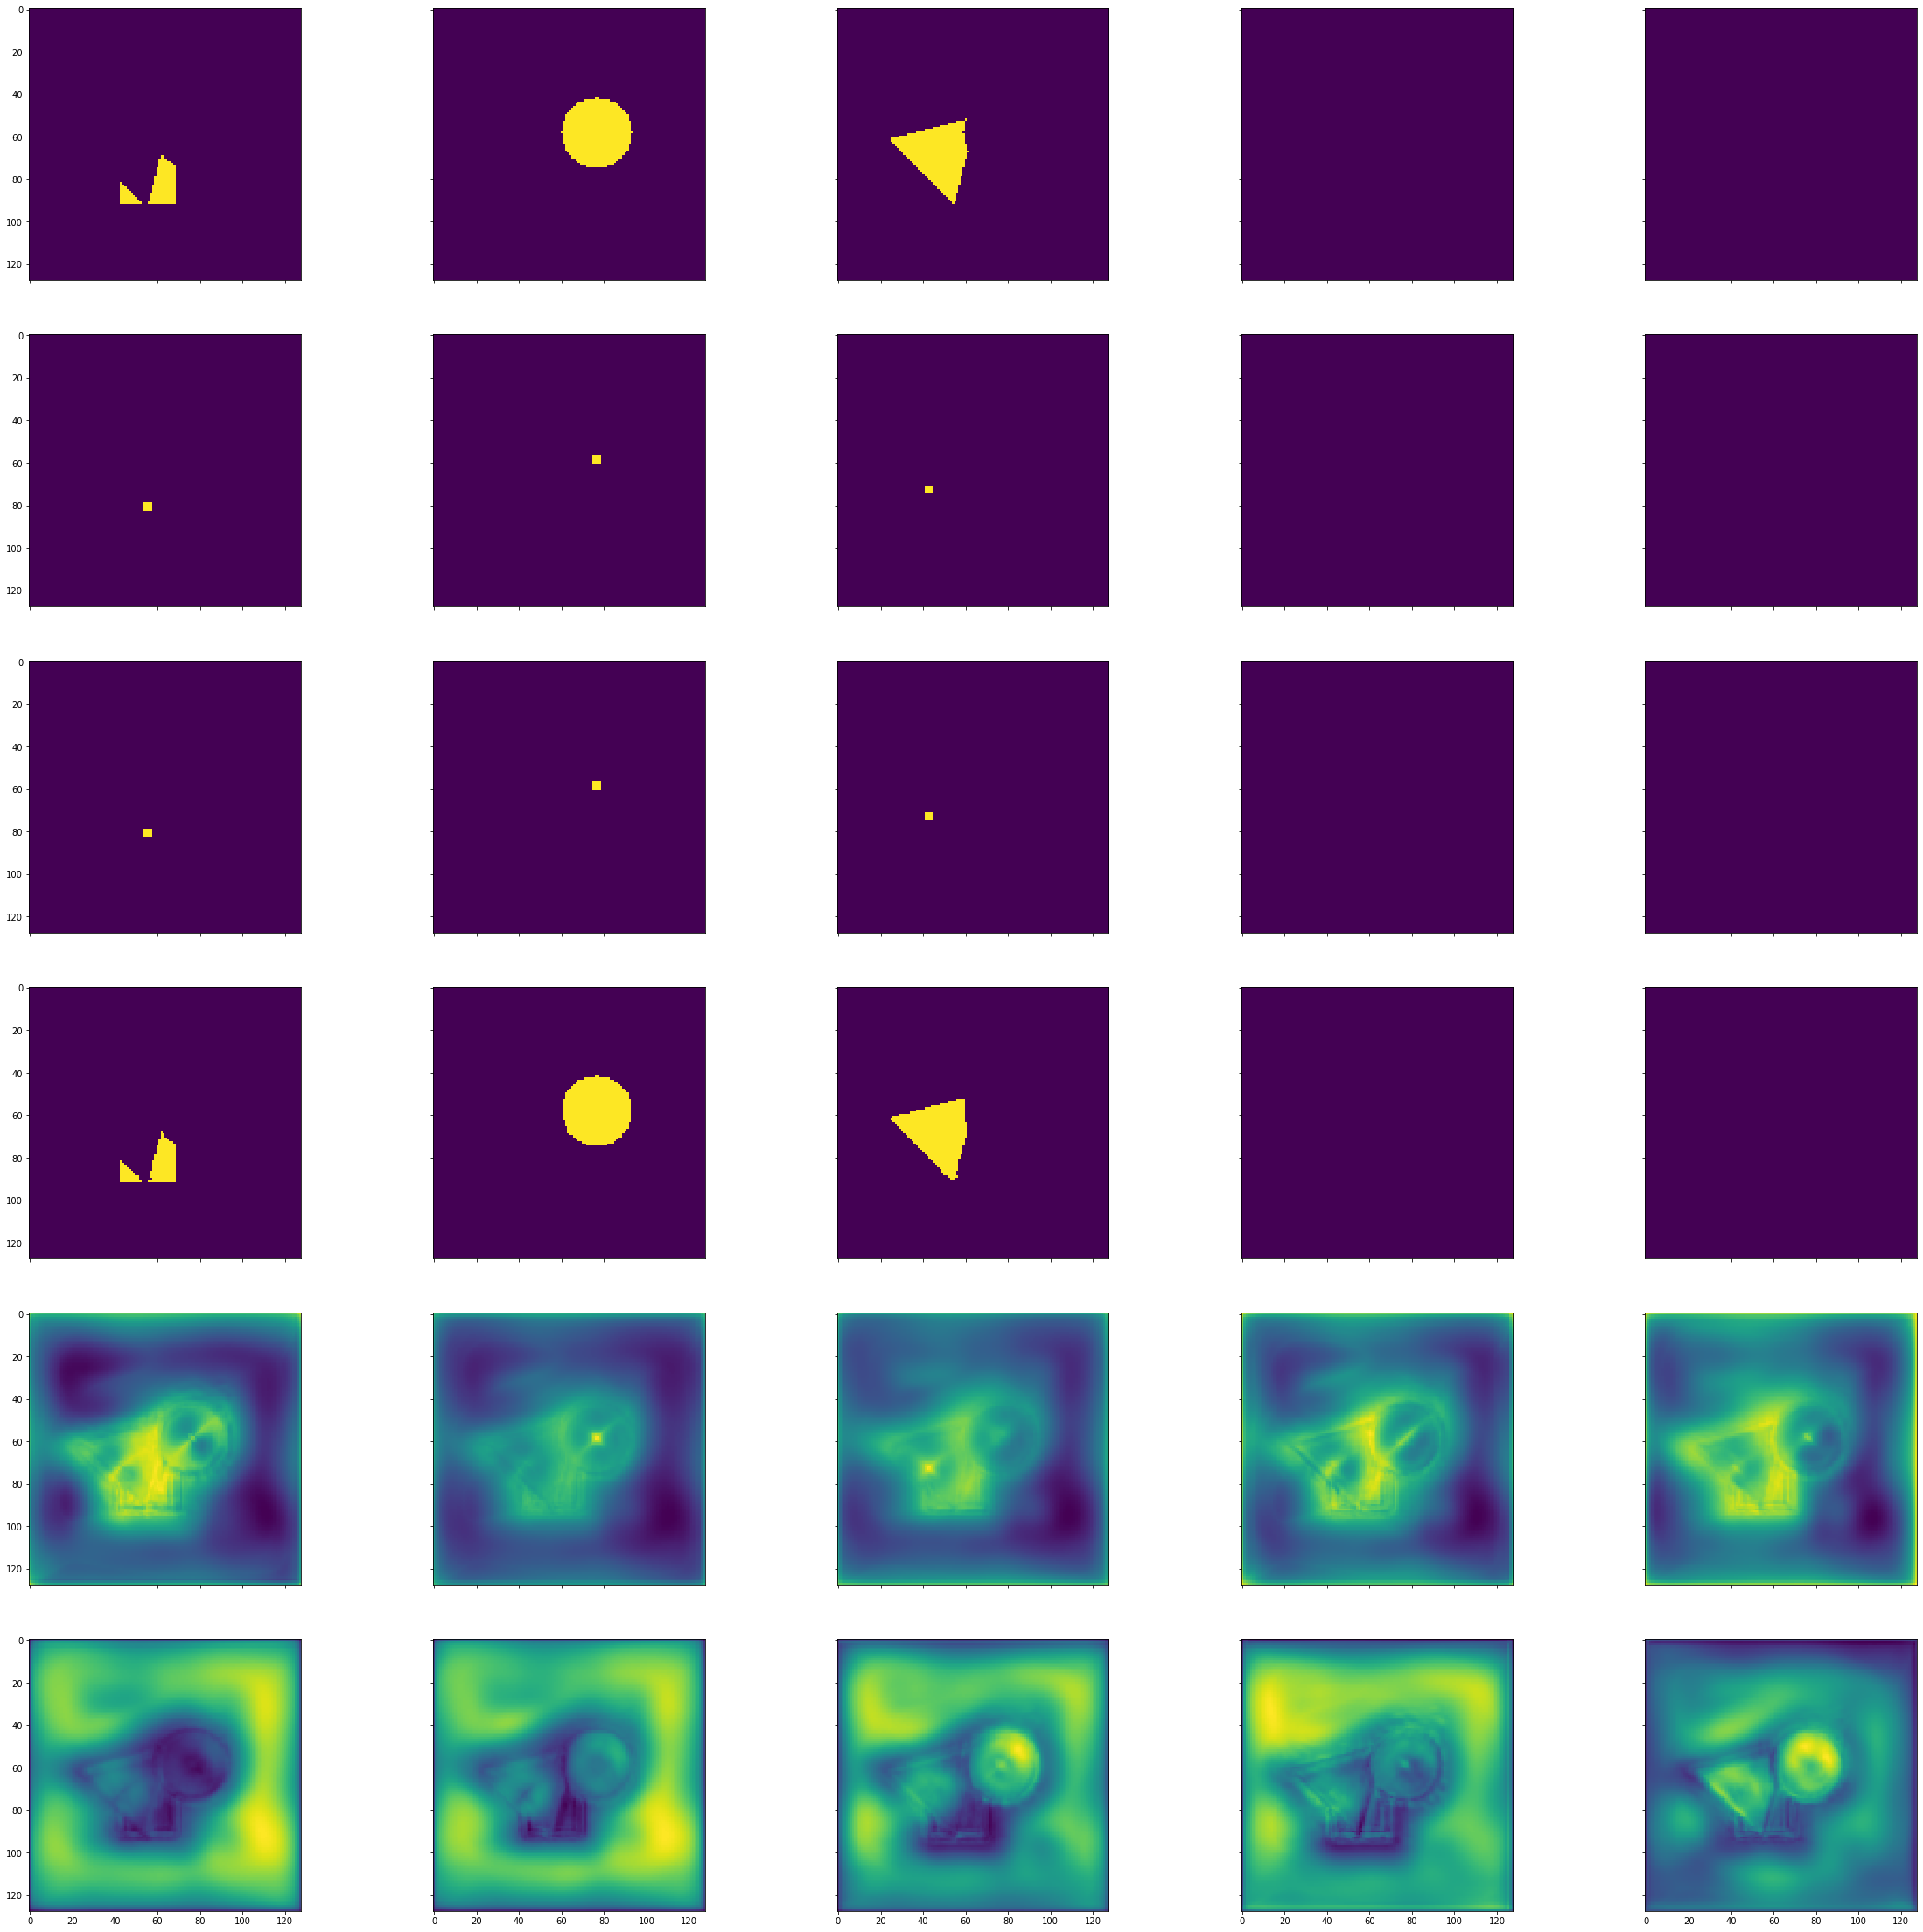

In [89]:
f, plots = plt.subplots(6, 5, sharex='all', sharey='all', figsize=(4 * 10, 4 * 10))
for i in range(n_class):
   # plt.figure()
    plots[0,i].imshow(labels_mask[0,i])
    plots[1,i].imshow(labels_center[0,i])
    plots[2,i].imshow(labels_width[0,i])
    plots[3,i].imshow(pred_masks[0,i])
    plots[4,i].imshow(pred_centers[0,i])
#    xx = pred_centers[0,i]
#    xx[xx>0] = 1
#    xx[xx<0] = 0
    #plots[4,i].imshow(xx)

    plots[5,i].imshow(pred_widths[0,i])
    

    

    


In [25]:
n_class

5

In [25]:
n_class

5

In [72]:
np.sort(pred_centers[-1,...][4].ravel())

array([-277.41052 , -277.16885 , -276.83246 , ...,   42.545418,
         42.914165,   46.0129  ], dtype=float32)

In [4]:
#plt.imshow(pred_masks[0].transpose((1, 2, 0)))
import math
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from scipy.ndimage.measurements import label  

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_class = 3
n_class=3
    
Dataset = get_dataset(opt.dataset, opt.task)
  
val_loader = torch.utils.data.DataLoader(
      Dataset(opt, 'val'), 
      batch_size=1, 
      shuffle=True,
      num_workers=1,
      pin_memory=True)
batch  = next(iter(val_loader))
for k in batch:
    if k != 'meta':
        batch[k] = batch[k].to(device=device, non_blocking=True)
inputs, labels_mask, labels_center, labels_width, labels_height  =batch['input'],batch['gt_segmap'], batch['gt_ctmap'], batch['gt_widmap'], batch['gt_heimap']

k =1
plt.imshow(pred_masks[0,k])

==> initializing shapes val data.
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loaded val 700 samples


NameError: name 'pred_masks' is not defined

In [20]:
img_id

tensor([432])

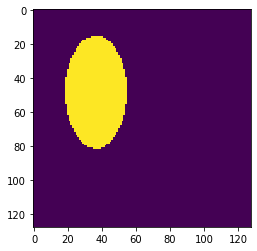

In [26]:
k = 4
plt.imshow(labels_mask[0,k])

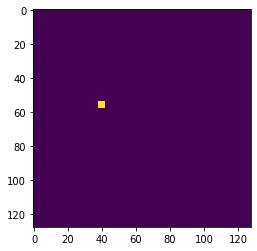

In [28]:
k=3
plt.imshow(labels_height[0,k])


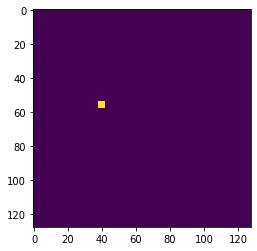

In [32]:
k = 3
plt.imshow(labels_width[0,k])

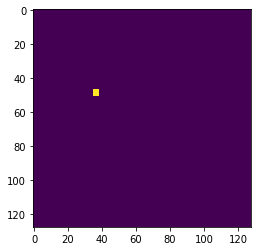

In [31]:
k = 4
plt.imshow(labels_center[0,k])

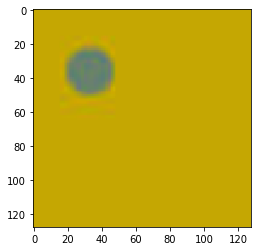

In [131]:
plt.figure()
#plt.imshow(reverse_transform(inputs[0].cpu()))
#plt.imshow(reverse_transform(labels_mask[0].cpu()))
#plt.imshow(reverse_transform(labels_center[0].cpu()))
#plt.imshow(reverse_transform(labels_width[0].cpu()))
#plt.imshow(reverse_transform(labels_height[0].cpu()))
plt.imshow(inputs[0].cpu().numpy().transpose((1, 2, 0))/255) #.dtype

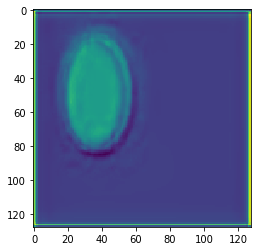

In [37]:
k = 4
plt.imshow(pred_widths[0,k])

In [59]:
l.shape

(1, 5, 128, 128)

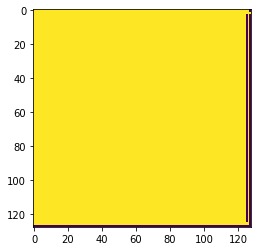

In [45]:
plt.imshow(pred_masks[0,4])